# <font color='blue'> Project 2 - Classification

### Group Members:
#### Femina Martin Pereira - FXP190002
#### Divya Deepak Pai - DXP190009

### Dataset Description:    
It is a Bank Marketing data set. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

The dataset has 4521 instances and 18 columns.

### Goal:
The classification goal is to predict if the client will subscribe a term deposit - yes or no (Column y).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset used in Project 1 (with Missing Values)

In [ ]:
df = pd.read_csv('bank_marketing_missing.csv')

In [ ]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,30.0,NaN,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,2,33.0,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,3,35.0,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,4,30.0,management,NaN,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,5,59.0,blue-collar,NaN,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,4517,33.0,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,4518,57.0,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,4519,57.0,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,4520,28.0,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,4521,44.0,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


### Perform Train and Test Splits

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state = 0)

In [ ]:
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4384,4385,52.0,management,single,tertiary,no,4,no,yes,cellular,28,jul,30,9,-1,0,unknown,no
2560,2561,44.0,blue-collar,married,secondary,no,1071,yes,no,cellular,11,may,143,3,357,1,failure,no
1470,1471,NaN,blue-collar,married,primary,no,4103,no,no,cellular,19,nov,291,1,-1,0,unknown,no
1771,1772,37.0,management,married,tertiary,no,347,yes,no,cellular,22,jul,282,1,-1,0,unknown,no
2604,2605,57.0,management,married,unknown,no,0,no,no,cellular,30,NaN,585,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1034,NaN,technician,single,secondary,no,534,yes,no,cellular,18,may,382,1,-1,0,unknown,no
3264,3265,36.0,management,single,tertiary,no,613,no,NaN,cellular,7,aug,86,2,-1,0,unknown,no
1653,1654,53.0,blue-collar,married,primary,no,306,no,no,cellular,28,jul,388,3,181,1,success,yes
2607,2608,32.0,blue-collar,married,NaN,no,642,no,yes,cellular,8,jul,524,1,-1,0,unknown,no


In [ ]:
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4274,4275,35.0,blue-collar,married,primary,no,378,yes,no,unknown,16,may,427,3,-1,0,unknown,no
72,73,31.0,management,NaN,tertiary,no,6248,yes,no,NaN,9,may,154,2,-1,0,unknown,no
1065,1066,30.0,unemployed,married,tertiary,no,0,yes,no,cellular,18,nov,756,1,-1,0,unknown,no
3185,3186,42.0,admin.,married,secondary,no,529,yes,yes,cellular,19,nov,193,3,-1,0,unknown,no
130,131,41.0,blue-collar,married,NaN,no,168,yes,no,cellular,18,nov,187,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,1791,NaN,technician,married,secondary,no,1477,yes,no,cellular,8,jul,355,1,-1,0,unknown,no
2106,2107,47.0,entrepreneur,married,primary,no,668,no,no,cellular,12,may,908,1,-1,0,unknown,no
242,243,44.0,management,married,tertiary,no,3762,no,no,cellular,28,aug,125,12,-1,0,unknown,no
4402,4403,41.0,NaN,married,primary,no,39,yes,no,cellular,21,NaN,549,2,-1,0,unknown,yes


### Explore the train data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 4384 to 2732
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         3390 non-null   int64  
 1   age        2754 non-null   float64
 2   job        3216 non-null   object 
 3   marital    3270 non-null   object 
 4   education  3219 non-null   object 
 5   default    3390 non-null   object 
 6   balance    3390 non-null   int64  
 7   housing    3390 non-null   object 
 8   loan       3186 non-null   object 
 9   contact    3084 non-null   object 
 10  day        3390 non-null   int64  
 11  month      3144 non-null   object 
 12  duration   3390 non-null   int64  
 13  campaign   3390 non-null   int64  
 14  pdays      3390 non-null   int64  
 15  previous   3390 non-null   int64  
 16  poutcome   3390 non-null   object 
 17  y          3390 non-null   object 
dtypes: float64(1), int64(7), object(10)
memory usage: 503.2+ KB


### Remove the insignificant columns from the train set

In [ ]:
train.drop('ID', axis = 1, inplace = True)

In [ ]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,2754.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,41.244735,1432.131563,15.848083,260.278171,2.792625,40.054277,0.543363
std,10.883711,3070.844395,8.232079,252.128385,3.067703,100.755075,1.695039
min,19.000000,-2082.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,32.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,40.000000,440.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,48.000000,1464.000000,21.000000,331.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### List of columns that have missing values

In [ ]:
train.columns[train.isnull().any()]

Index(['age', 'job', 'marital', 'education', 'loan', 'contact', 'month'], dtype='object')

### Exploratory Data Analysis

Let us explore some of the features that will be used in our classification algorithms. This will give us a better idea about the distribution of features as well as how to handle imputation of missing values in order to clean the data.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

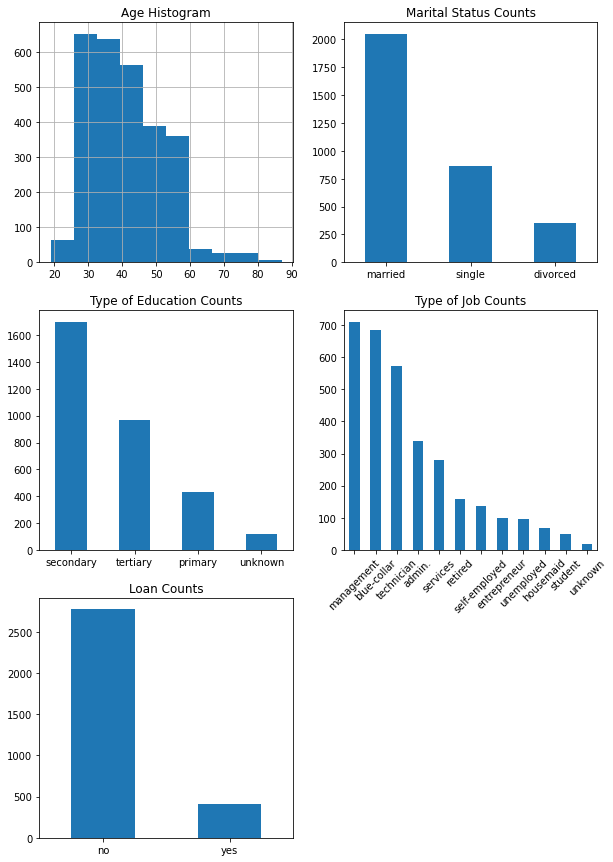

In [ ]:
# Set up a grid of plots
# import pylab as plt1
# fig = plt1.figure(figsize=fizsize_with_subplots) 
plt.figure(figsize=(10,15)) 
fig_dims = (3, 2)

# Plot age histogram
plt.subplot2grid(fig_dims, (0,0))
train['age'].hist()
plt.title('Age Histogram')

# Plot marital status counts
plt.subplot2grid(fig_dims, (0, 1))
train['marital'].value_counts().plot(kind='bar', 
                                       title='Marital Status Counts')
plt.xticks(rotation=0)

# Plot Type of Education counts
plt.subplot2grid(fig_dims, (1, 0))
train['education'].value_counts().plot(kind='bar', 
                                    title='Type of Education Counts')
plt.xticks(rotation=0)

# Plot type of job counts
plt.subplot2grid(fig_dims, (1, 1))
train['job'].value_counts().plot(kind='bar', 
                                         title='Type of Job Counts')
plt.xticks(rotation=45)

# Plot loan counts
plt.subplot2grid(fig_dims, (2, 0))
train['loan'].value_counts().plot(kind='bar', 
                                         title='Loan Counts')
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

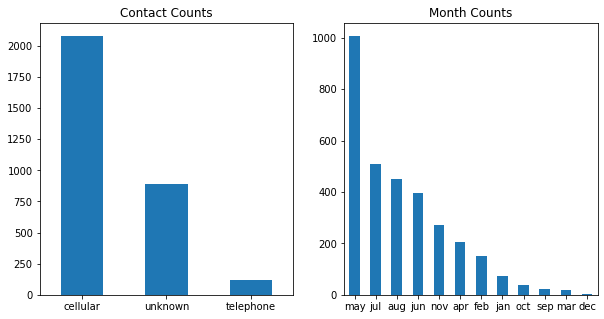

In [ ]:
plt.figure(figsize=(10,5)) 
fig_dims = (1, 2)

# Plot contact counts
plt.subplot2grid(fig_dims, (0, 0))
train['contact'].value_counts().plot(kind='bar', 
                                         title='Contact Counts')
plt.xticks(rotation=0)

# Plot month counts
plt.subplot2grid(fig_dims, (0, 1))
train['month'].value_counts().plot(kind='bar', 
                                         title='Month Counts')
plt.xticks(rotation=0)

### Imputation of NaN values - Train data

### Feature: AGE

As we can see from the above plot that Age histogram is right-skewed. Thus, we will impute the NaN values in the AGE column by the median value of age.

In [ ]:
train['age']= train['age'].fillna(train['age'].median())
train['age'] = train['age'].astype(int)

### Feature: MARITAL

As we can see that marital is a categorical variable with categories - married, divorced and single. Since, the category 'married' has the highest frequency, thus, we will impute the NaN values by 'married'.

In [ ]:
train['marital'].replace(np.NaN, 'married', inplace = True)

### Feature: EDUCATION

Education is a categorical variable with categories - unknown, secondary, primary and tertiary. As we can see that the clients have attained secondary education mostly, thus, we replace the NaN values by the category 'secondary'. 

In [ ]:
train['education'].replace(np.NaN, 'secondary', inplace = True)

### Feature: JOB

Job is a categorical variable with 12 categories- 'admin.','unknown','unemployed','management','housemaid','entrepreneur','student', 'blue-collar','self-employed','retired','technician','services'. The 2 highly frequent categories are management and blue-collar. We impute the NaN values by the mode value, that is highly frequent category, thus by 'management'.

In [ ]:
train['job'].replace(np.NaN, 'management', inplace = True)

### Feature: LOAN

Loan is a binary variable with values yes or no. Since, a majority of clients did not have a personal loan, we will impute the NaN values by 'no'.

In [ ]:
train['loan'].replace(np.NaN, 'no', inplace = True)

### Feature: CONTACT

Contact is a categorical variable with categories- unknown, cellular and telephone. Since, the contact type 'cellular' is highly frequent in the dataset, we replace the NaN values by 'cellular'.

In [ ]:
train['contact'].replace(np.NaN, 'cellular', inplace = True)

### Feature: MONTH

Month is again a categorical variable with values - jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov and dec. Since, most of the last contacts were made in the month of may, we replace the NaN values by 'may'.

In [ ]:
train['month'].replace(np.NaN, 'may', inplace = True)

We have imputed all the missing values with either mean or median or mode of the columns. Thus, the data is now complete with no NaN values.

In [ ]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 4384 to 2732
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        3390 non-null   int64 
 1   job        3390 non-null   object
 2   marital    3390 non-null   object
 3   education  3390 non-null   object
 4   default    3390 non-null   object
 5   balance    3390 non-null   int64 
 6   housing    3390 non-null   object
 7   loan       3390 non-null   object
 8   contact    3390 non-null   object
 9   day        3390 non-null   int64 
 10  month      3390 non-null   object
 11  duration   3390 non-null   int64 
 12  campaign   3390 non-null   int64 
 13  pdays      3390 non-null   int64 
 14  previous   3390 non-null   int64 
 15  poutcome   3390 non-null   object
 16  y          3390 non-null   object
dtypes: int64(7), object(10)
memory usage: 476.7+ KB


### Data Transformation - Train data 

Let us go through each categorical/ordinal/binary columns and perform data transformation by either mapping or one hot vector encoding. Columns 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome' and 'y' are of data type object. Also, column 'day' is not an object, it is an integer value from 1 to 31, but it requires data transformation as it is not a numeric value that can be added or subtracted, it represents the dates in a month.

Data Transformation on column JOB : one hot vector of length 12

In [ ]:
cols = pd.get_dummies(train['job'], prefix= 'job')
train[cols.columns] = cols
train.drop('job', axis = 1, inplace = True)

Data Transformation on column MARITAL : one hot vector of length 3

In [ ]:
cols = pd.get_dummies(train['marital'], prefix= 'marital')
train[cols.columns] = cols
train.drop('marital', axis = 1, inplace = True)

Data Transformation on column EDUCATION : 0 to 3

In [ ]:
train['education'] = train['education'].map({'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}).astype(int)

Data Transformation on column DEFAULT : We will plot 'default' to see the number of yes and no.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

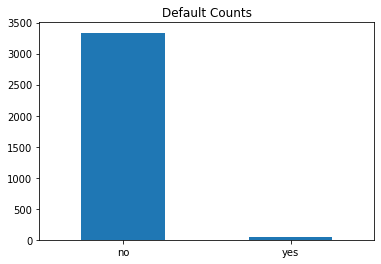

In [ ]:
train['default'].value_counts().plot(kind='bar', title='Default Counts')
plt.xticks(rotation=0)

We can see that the frequent class in column 'default' is 'no'. Thus, 'no' is mapped to 1 and 'yes' to 0.

In [ ]:
train['default'] = train['default'].map({'no':1, 'yes':0}).astype(int)

Data Transformation on column HOUSING : We will plot 'housing' to see the number of yes and no.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

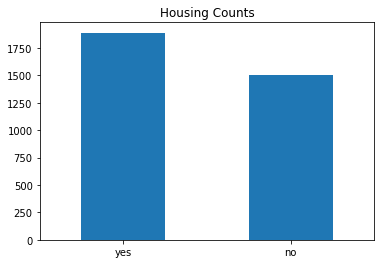

In [ ]:
train['housing'].value_counts().plot(kind='bar', title='Housing Counts')
plt.xticks(rotation=0)

We can see that the frequent class in column 'housing' is 'yes'. Thus, 'yes' is mapped to 1 and 'no' to 0.

In [ ]:
train['housing'] = train['housing'].map({'yes':1, 'no':0}).astype(int)

Data Transformation on column LOAN : We will plot 'loan' to see the number of yes and no.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

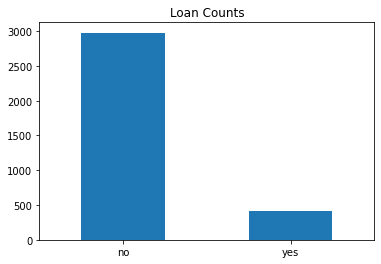

In [ ]:
train['loan'].value_counts().plot(kind='bar', title='Loan Counts')
plt.xticks(rotation=0)

We can see that the frequent class in column 'loan' is 'no'. Thus, 'no' is mapped to 1 and 'yes' to 0.

In [ ]:
train['loan'] = train['loan'].map({'no':1, 'yes':0}).astype(int)

Data Transformation on column CONTACT : one hot vector of length 3

In [ ]:
cols = pd.get_dummies(train['contact'], prefix= 'contact')
train[cols.columns] = cols
train.drop('contact', axis = 1, inplace = True)

Data Transformation on column MONTH : one hot vector of length 12

In [ ]:
cols = pd.get_dummies(train['month'], prefix= 'month')
train[cols.columns] = cols
train.drop('month', axis = 1, inplace = True)

Data Transformation on column POUTCOME : one hot vector of length 4

In [ ]:
cols = pd.get_dummies(train['poutcome'], prefix= 'poutcome')
train[cols.columns] = cols
train.drop('poutcome', axis = 1, inplace = True)

Data Transformation on column y(target value) : We will plot 'y' to see the number of yes and no.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

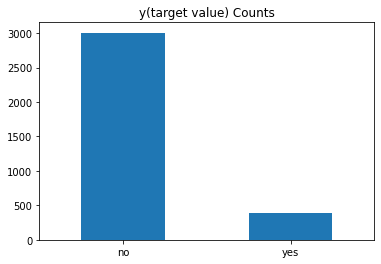

In [ ]:
train['y'].value_counts().plot(kind='bar', title='y(target value) Counts')
plt.xticks(rotation=0)

We can see that the frequent class in column 'y' is 'no'. Thus, 'no' is mapped to 1 and 'yes' to 0.

In [ ]:
train['y'] = train['y'].map({'no':1, 'yes':0}).astype(int)

Data Transformation on column DAY : one hot vector of length 31 (Since, it represents the last contact day of the month)

In [ ]:
cols = pd.get_dummies(train['day'], prefix= 'day')
train[cols.columns] = cols
train.drop('day', axis = 1, inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 4384 to 2732
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                3390 non-null   int64
 1   education          3390 non-null   int64
 2   default            3390 non-null   int64
 3   balance            3390 non-null   int64
 4   housing            3390 non-null   int64
 5   loan               3390 non-null   int64
 6   duration           3390 non-null   int64
 7   campaign           3390 non-null   int64
 8   pdays              3390 non-null   int64
 9   previous           3390 non-null   int64
 10  y                  3390 non-null   int64
 11  job_admin.         3390 non-null   uint8
 12  job_blue-collar    3390 non-null   uint8
 13  job_entrepreneur   3390 non-null   uint8
 14  job_housemaid      3390 non-null   uint8
 15  job_management     3390 non-null   uint8
 16  job_retired        3390 non-null   uint8
 17  job_self-em

In [ ]:
train.shape

(3390, 76)

### Imputing Missing Values in Test data

The imputatin of missing values performed for the train data should be replicated for the test data as well. 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131 entries, 4274 to 1606
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1131 non-null   int64  
 1   age        911 non-null    float64
 2   job        1065 non-null   object 
 3   marital    1101 non-null   object 
 4   education  1076 non-null   object 
 5   default    1131 non-null   object 
 6   balance    1131 non-null   int64  
 7   housing    1131 non-null   object 
 8   loan       1070 non-null   object 
 9   contact    1036 non-null   object 
 10  day        1131 non-null   int64  
 11  month      1049 non-null   object 
 12  duration   1131 non-null   int64  
 13  campaign   1131 non-null   int64  
 14  pdays      1131 non-null   int64  
 15  previous   1131 non-null   int64  
 16  poutcome   1131 non-null   object 
 17  y          1131 non-null   object 
dtypes: float64(1), int64(7), object(10)
memory usage: 167.9+ KB


In [ ]:
test.drop('ID', axis = 1, inplace = True)

In [ ]:
test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,911.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,41.148189,1394.261715,16.116711,275.000884,2.796640,38.904509,0.540230
std,10.394789,2819.343894,8.294608,281.583539,3.234114,98.235403,1.689876
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,61.500000,9.000000,105.000000,1.000000,-1.000000,0.000000
50%,40.000000,456.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,48.000000,1547.000000,22.000000,324.000000,3.000000,-1.000000,0.000000
max,83.000000,27359.000000,31.000000,2087.000000,32.000000,541.000000,23.000000


In [ ]:
test.columns[test.isnull().any()]

Index(['age', 'job', 'marital', 'education', 'loan', 'contact', 'month'], dtype='object')

In [ ]:
# Feature: AGE
test['age']= test['age'].fillna(test['age'].median())
test['age'] = test['age'].astype(int)

# Feature: MARITAL
test['marital'].replace(np.NaN, 'married', inplace = True)

# Feature: EDUCATION
test['education'].replace(np.NaN, 'secondary', inplace = True)

# Feature: JOB
test['job'].replace(np.NaN, 'management', inplace = True)

# Feature: LOAN
test['loan'].replace(np.NaN, 'no', inplace = True)

# Feature: CONTACT
test['contact'].replace(np.NaN, 'cellular', inplace = True)

# Feature: MONTH
test['month'].replace(np.NaN, 'may', inplace = True)

In [ ]:
test.columns[test.isnull().any()]

Index([], dtype='object')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131 entries, 4274 to 1606
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1131 non-null   int64 
 1   job        1131 non-null   object
 2   marital    1131 non-null   object
 3   education  1131 non-null   object
 4   default    1131 non-null   object
 5   balance    1131 non-null   int64 
 6   housing    1131 non-null   object
 7   loan       1131 non-null   object
 8   contact    1131 non-null   object
 9   day        1131 non-null   int64 
 10  month      1131 non-null   object
 11  duration   1131 non-null   int64 
 12  campaign   1131 non-null   int64 
 13  pdays      1131 non-null   int64 
 14  previous   1131 non-null   int64 
 15  poutcome   1131 non-null   object
 16  y          1131 non-null   object
dtypes: int64(7), object(10)
memory usage: 159.0+ KB


### Data Transformation - Test Data

The data transformation steps performed for the train data should be replicated for the test data as well.

In [ ]:
# Feature: JOB
cols = pd.get_dummies(test['job'], prefix= 'job')
test[cols.columns] = cols
test.drop('job', axis = 1, inplace = True)

#Feature: MARITAL
cols = pd.get_dummies(test['marital'], prefix= 'marital')
test[cols.columns] = cols
test.drop('marital', axis = 1, inplace = True)

# Feature: EDUCATION
test['education'] = test['education'].map({'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}).astype(int)

# Feature: DEFAULT
test['default'] = test['default'].map({'no':1, 'yes':0}).astype(int)

# Feature: HOUSING
test['housing'] = test['housing'].map({'yes':1, 'no':0}).astype(int)

# Feature: LOAN
test['loan'] = test['loan'].map({'no':1, 'yes':0}).astype(int)

# Feature: CONTACT
cols = pd.get_dummies(test['contact'], prefix= 'contact')
test[cols.columns] = cols
test.drop('contact', axis = 1, inplace = True)

# Feature: MONTH
cols = pd.get_dummies(test['month'], prefix= 'month')
test[cols.columns] = cols
test.drop('month', axis = 1, inplace = True)

# Feature: POUTCOME
cols = pd.get_dummies(test['poutcome'], prefix= 'poutcome')
test[cols.columns] = cols
test.drop('poutcome', axis = 1, inplace = True)

# Feature: Y (Target Value)
test['y'] = test['y'].map({'no':1, 'yes':0}).astype(int)

# Feature: DAY
cols = pd.get_dummies(test['day'], prefix= 'day')
test[cols.columns] = cols
test.drop('day', axis = 1, inplace = True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131 entries, 4274 to 1606
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                1131 non-null   int64
 1   education          1131 non-null   int64
 2   default            1131 non-null   int64
 3   balance            1131 non-null   int64
 4   housing            1131 non-null   int64
 5   loan               1131 non-null   int64
 6   duration           1131 non-null   int64
 7   campaign           1131 non-null   int64
 8   pdays              1131 non-null   int64
 9   previous           1131 non-null   int64
 10  y                  1131 non-null   int64
 11  job_admin.         1131 non-null   uint8
 12  job_blue-collar    1131 non-null   uint8
 13  job_entrepreneur   1131 non-null   uint8
 14  job_housemaid      1131 non-null   uint8
 15  job_management     1131 non-null   uint8
 16  job_retired        1131 non-null   uint8
 17  job_self-em

In [ ]:
test.shape

(1131, 76)

#### We have imputed the missing values as well as performed data transformation. Thus, our train and test data sets are completely clean. Now, the next steps will be to separate the feature set and target value in the train and test data and then, perform scaling on the feature set of train and test data. 

### Separating Feature set and Target value in Train and Test Data Sets

In [ ]:
# Create feature set and target value in train data
train_feature = train.drop('y', axis = 1)
train_target = train['y']

# Create feature set and target value in test data
test_feature = test.drop('y', axis = 1)
test_target = test['y']

### Since, it is a Classification problem, we perform MinMaxScaler() to scale the feature set in train and test data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_feature_scaled = scaler.fit_transform(train_feature)
test_feature_scaled = scaler.transform(test_feature)

In [ ]:
# Convert array back to dataframe
from pandas import DataFrame
train_scaled = DataFrame(train_feature_scaled)

In [ ]:
# Convert array back to dataframe
from pandas import DataFrame
test_scaled = DataFrame(test_feature_scaled)

### Classification Tasks

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import matplotlib.gridspec as gridspec
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from  sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

### Note: For all the below Classification Tasks, the Evaluation Function used is the same from Project 1 - ROC_AUC Score.

### 1. Voting Classifiers

### Hard Voting

The algorithms that are used for hard voting classifier are kNN Classifier, Logistic Regression and Decision Tree Classifier.

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=11, weights='uniform',metric='manhattan')
lr_clf = LogisticRegression(C=1, penalty='l2', random_state=0)
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
hard_voting_clf = VotingClassifier(estimators=[('knn', knn_clf), ('logreg', lr_clf),('dt', dt_clf)], voting='hard')                                              
hard_voting_clf.fit(train_scaled, train_target)

# Calculating Accuracy using Voting Classifier for hard voting
print("Hard Voting train score: {:.4f}".format(hard_voting_clf.score(train_scaled, train_target)))
print("Hard Voting test score: {:.4f}".format(hard_voting_clf.score(test_scaled, test_target)))

Hard Voting train score: 0.9015
Hard Voting test score: 0.8904


### Evaluation of Hard Voting

##### Since predict_proba is not available when voting = 'hard', we cannot evaluate using ROC_AUC score. Thus, we have calculated the F1 score instead. 

##### F1 Score

In [ ]:
hardPred = hard_voting_clf.predict(test_scaled)

In [ ]:
print("F1 score for Hard Voting: {:.4f}".format(f1_score(test_target, hardPred)))

F1 score for Hard Voting: 0.9408


### Soft Voting

The algorithms that are used for soft voting classifier are kNN Classifier, Logistic Regression and Decision Tree Classifier.

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=11, weights='uniform',metric='manhattan')
lr_clf = LogisticRegression(C=1, penalty='l2',random_state=0)
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
soft_voting_clf = VotingClassifier(estimators=[('knn', knn_clf), ('logreg', lr_clf),
                                               ('dt', dt_clf)], voting='soft')
soft_voting_clf.fit(train_scaled, train_target)

# Calculating Accuracy using Voting Classifier for soft voting
print("Soft Voting train score: {:.4f}".format(soft_voting_clf.score(train_scaled, train_target)))
print("Soft Voting test score: {:.4f}".format(soft_voting_clf.score(test_scaled, test_target)))

Soft Voting train score: 0.9038
Soft Voting test score: 0.8886


### Evaluation of Soft Voting

##### F1 Score

In [ ]:
softPred = soft_voting_clf.predict(test_scaled)

In [ ]:
print("F1 score for Soft Voting: {:.4f}".format(f1_score(test_target, softPred)))

F1 score for Soft Voting: 0.9400


##### ROC_AUC Score

In [ ]:
soft_prob = soft_voting_clf.predict_proba(test_scaled)
soft_prob = soft_prob[:,1]
rascore_soft = roc_auc_score(test_target, soft_prob)
print("ROC_AUC Score for Soft Voting: {:.4f}".format(rascore_soft))

ROC_AUC Score for Soft Voting: 0.8942


### 2. Bagging and Pasting

### Bagging using Logistic Regression

In [ ]:
lr_clf = LogisticRegression(C=1, penalty='l2',random_state=0)
lr_bag_clf = BaggingClassifier(lr_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
lr_bag_clf.fit(train_scaled, train_target)

print('Train score: {:.4f}'.format(lr_bag_clf.score(train_scaled, train_target)))
print('Test score: {:.4f}'.format(lr_bag_clf.score(test_scaled, test_target)))

Train score: 0.8870
Test score: 0.8780


#### Evaluation 

In [ ]:
bagLR_prob = lr_bag_clf.predict_proba(test_scaled)
bagLR_prob = bagLR_prob[:,1]
rascore_bagLR = roc_auc_score(test_target, bagLR_prob)
print("ROC_AUC Score for Bagging using Logistic Regression: {:.4f}".format(rascore_bagLR))

ROC_AUC Score for Bagging using Logistic Regression: 0.7687


### Bagging using Decision Tree Classifier

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=0)
dt_clf.fit(train_scaled, train_target)
dt_bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
dt_bag_clf.fit(train_scaled, train_target)

print('Train score: {:.4f}'.format(dt_bag_clf.score(train_scaled, train_target)))
print('Test score: {:.4f}'.format(dt_bag_clf.score(test_scaled, test_target)))

Train score: 0.8914
Test score: 0.8877


#### Evaluation

In [ ]:
bagDT_prob = dt_bag_clf.predict_proba(test_scaled)
bagDT_prob = bagDT_prob[:,1]
rascore_bagDT = roc_auc_score(test_target, bagDT_prob)
print("ROC_AUC Score for Bagging using Decision Tree Classifier: {:.4f}".format(rascore_bagDT))

ROC_AUC Score for Bagging using Decision Tree Classifier: 0.8840


### Pasting using Logistic Regression

In [ ]:
lr_clf = LogisticRegression(C=1, penalty='l2',random_state=0)
lr_bag_clf = BaggingClassifier(lr_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)
lr_bag_clf.fit(train_scaled, train_target)

print('Train score: {:.4f}'.format(lr_bag_clf.score(train_scaled, train_target)))
print('Test score: {:.4f}'.format(lr_bag_clf.score(test_scaled, test_target)))

Train score: 0.8870
Test score: 0.8780


#### Evaluation

In [ ]:
pasteLR_prob = lr_bag_clf.predict_proba(test_scaled)
pasteLR_prob = pasteLR_prob[:,1]
rascore_pasteLR = roc_auc_score(test_target, pasteLR_prob)
print("ROC_AUC Score for Pasting using Logistic Regression: {:.4f}".format(rascore_pasteLR))

ROC_AUC Score for Pasting using Logistic Regression: 0.7695


### Pasting using Decision Tree Classifier

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=0)
dt_bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)
dt_bag_clf.fit(train_scaled, train_target)

print('Train score: {:.4f}'.format(dt_bag_clf.score(train_scaled, train_target)))
print('Test score: {:.4f}'.format(dt_bag_clf.score(test_scaled, test_target)))

Train score: 0.8926
Test score: 0.8886


#### Evaluation

In [ ]:
pasteDT_prob = dt_bag_clf.predict_proba(test_scaled)
pasteDT_prob = pasteDT_prob[:,1]
rascore_pasteDT = roc_auc_score(test_target, pasteDT_prob)
print("ROC_AUC Score for Pasting using Decision Tree Classifier: {:.4f}".format(rascore_pasteDT))

ROC_AUC Score for Pasting using Decision Tree Classifier: 0.8826


### 3. Adaboost Boosting

### Adaboost Boosting using Logistic Regression

In [ ]:
lr_clf = LogisticRegression(C=1, penalty='l2', random_state=0)
lr_ada_clf = AdaBoostClassifier(lr_clf, n_estimators=500, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
lr_ada_clf.fit(train_scaled, train_target)

print('Train score: {:.4f}'.format(lr_ada_clf.score(train_scaled, train_target)))
print('Test score: {:.4f}'.format(lr_ada_clf.score(test_scaled, test_target)))

Train score: 0.8962
Test score: 0.8886


#### Evaluation

In [ ]:
adaLR_prob = lr_ada_clf.predict_proba(test_scaled)
adaLR_prob = adaLR_prob[:,1]
rascore_adaLR = roc_auc_score(test_target, adaLR_prob)
print("ROC_AUC Score for Adaboost Boosting using Logistic Regression: {:.4f}".format(rascore_adaLR))

ROC_AUC Score for Adaboost Boosting using Logistic Regression: 0.8608


### Adaboost Boosting using Decision Tree Classifier

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=1, random_state=0)
dt_ada_clf = AdaBoostClassifier(dt_clf, n_estimators=500, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
dt_ada_clf.fit(train_scaled, train_target)

print('Train score: {:.4f}'.format(dt_ada_clf.score(train_scaled, train_target)))
print('Test score: {:.4f}'.format(dt_ada_clf.score(test_scaled, test_target)))

Train score: 0.9189
Test score: 0.8771


#### Evaluation

In [ ]:
adaDT_prob = dt_ada_clf.predict_proba(test_scaled)
adaDT_prob = adaDT_prob[:,1]
rascore_adaDT = roc_auc_score(test_target, adaDT_prob)
print("ROC_AUC Score for Adaboost Boosting using Decision Tree Classifier: {:.4f}".format(rascore_adaDT))

ROC_AUC Score for Adaboost Boosting using Decision Tree Classifier: 0.8535


### 4. Gradient Boosting

In [ ]:
# Grid Search to find the best hyperparameters
param_grid = {'max_depth': [1, 2, 3, 4, 5],
              'learning_rate': [0.01, 0.1, 0.5, 0.75, 1],
              'random_state': [0]}
grid_search_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, n_jobs = -1, cv=3, return_train_score=True)

In [ ]:
grid_search_gbc.fit(train_scaled, train_target)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [ ]:
print("Best parameters: {}".format(grid_search_gbc.best_params_))

Best parameters: {'learning_rate': 0.5, 'max_depth': 1, 'random_state': 0}


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.5)
gbrt.fit(train_scaled, train_target)

print("Accuracy on training set: {:.4f}".format(gbrt.score(train_scaled, train_target)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(test_scaled, test_target)))

Accuracy on training set: 0.9097
Accuracy on test set: 0.8921


#### Evaluation

In [ ]:
grad_prob = grid_search_gbc.predict_proba(test_scaled)
grad_prob = grad_prob[:,1]
rascore_grad = roc_auc_score(test_target, grad_prob)
print("ROC_AUC Score for Gradient Boosting Classifier: {:.4f}".format(rascore_grad))

ROC_AUC Score for Gradient Boosting Classifier: 0.8800


### 5. Principal Component Analysis (PCA)

In [ ]:
pca = PCA(n_components=0.95, random_state=0)

In [ ]:
X_train_reduced = pca.fit_transform(train_scaled)

In [ ]:
X_test_reduced = pca.transform(test_scaled)

In [ ]:
pca.n_components_

48

#### Before performing PCA, there were 75 features. After PCA, we can see from above that now we have 48 features. Thus, the correlated columns have been removed and we have only uncorrelated features in the train and test data sets.

#### Now we will be applying all the models with the reduced data set. The Evaluation Function to be used will be ROC_AUC Score as mentioned earlier.

### 1. kNN Classification

In [ ]:
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12],
              'weights': ['uniform','distance'],
              'metric': ['euclidean','manhattan']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [ ]:
grid_search_knn.fit(X_train_reduced, train_target)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}
Best cross-validation score: 0.89


In [ ]:
print("Best train score: {:.4f}".format(grid_search_knn.score(X_train_reduced,train_target)))
print("Best test score: {:.4f}".format(grid_search_knn.score(X_test_reduced,test_target)))

Best train score: 0.8947
Best test score: 0.8806


#### As we can see from above, the best parameters for kNN model are metric = manhattan, weights = uniform with k=12. Without PCA, k was equal to 11, now it is 12, rest all hyperparameters being unchanged.

#### Evaluation

In [ ]:
knn_prob = grid_search_knn.predict_proba(X_test_reduced)
knn_prob = knn_prob[:,1]
rascore_knn = roc_auc_score(test_target, knn_prob)
print("ROC_AUC Score for K Neighbors Classifier: {:.4f}".format(rascore_knn))

ROC_AUC Score for K Neighbors Classifier: 0.6997


### 2. Logistic Regression

In [ ]:
param_grid = {'C': [0.01,0.1,1,10,100],
              'penalty': ['l1','l2']}
grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [ ]:
grid_search_logistic.fit(X_train_reduced, train_target)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
print("Best parameters: {}".format(grid_search_logistic.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_logistic.best_score_))

Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.90


In [ ]:
print("Best train score: {:.4f}".format(grid_search_logistic.score(X_train_reduced,train_target)))
print("Best test score: {:.4f}".format(grid_search_logistic.score(X_test_reduced,test_target)))

Best train score: 0.8956
Best test score: 0.8886


#### As we can see from above, the best parameters for Logistic Regression model are c = 1 and penalty = l2, which are the same as without PCA.

#### Evaluation

In [ ]:
lr_prob = grid_search_logistic.predict_proba(X_test_reduced)
lr_prob = lr_prob[:,1]
rascore_lr = roc_auc_score(test_target, lr_prob)
print("ROC_AUC Score for Logistic Regression: {:.4f}".format(rascore_lr))

ROC_AUC Score for Logistic Regression: 0.7147


### 3. Linear Support Vector Machine

In [ ]:
param_grid = {'C': [0.001,0.01,0.1,1,10,100]}
grid_search_lsvc = GridSearchCV(LinearSVC(), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [ ]:
grid_search_lsvc.fit(X_train_reduced, train_target)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
print("Best parameters: {}".format(grid_search_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lsvc.best_score_))

Best parameters: {'C': 0.1}
Best cross-validation score: 0.89


In [ ]:
print("Best train score: {:.4f}".format(grid_search_lsvc.score(X_train_reduced,train_target)))
print("Best test score: {:.4f}".format(grid_search_lsvc.score(X_test_reduced,test_target)))

Best train score: 0.8935
Best test score: 0.8930


#### As we can see from above, the best parameter for Linear SVM Model is c = 0.1. Without PCA, it was c = 10.

#### Evaluation

In [ ]:
lsvc_prob = grid_search_lsvc.decision_function(X_test_reduced)
rascore_lsvc = roc_auc_score(test_target, lsvc_prob)
print("ROC_AUC Score for Linear SVC: {:.4f}".format(rascore_lsvc))

ROC_AUC Score for Linear SVC: 0.7206


### 4. Kernelized SVM using rbf kernel

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_rbf = GridSearchCV(SVC(kernel="rbf"), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [ ]:
grid_search_rbf.fit(X_train_reduced, train_target)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
print("Best parameters: {}".format(grid_search_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_rbf.best_score_))

Best parameters: {'C': 10, 'gamma': 0.01}
Best cross-validation score: 0.89


In [ ]:
print("Best train score: {:.4f}".format(grid_search_rbf.score(X_train_reduced,train_target)))
print("Best test score: {:.4f}".format(grid_search_rbf.score(X_test_reduced,test_target)))

Best train score: 0.8926
Best test score: 0.8939


#### As we can see from above, the best hyper parameters for the SVC with RBF kernel are c = 10 and gamma = 0.01. Without PCA, they were c = 100 and gamma = 0.01.

#### Evaluation

In [ ]:
rbf_prob = grid_search_rbf.decision_function(X_test_reduced)
rascore_rbf = roc_auc_score(test_target, rbf_prob)
print("ROC_AUC Score for Kernelized SVC with RBF Kernel: {:.4f}".format(rascore_rbf))

ROC_AUC Score for Kernelized SVC with RBF Kernel: 0.7424


### 5. Kernelized SVM using poly kernel

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_poly = GridSearchCV(SVC(kernel="poly"), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [ ]:
grid_search_poly.fit(X_train_reduced, train_target)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

In [ ]:
print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.89


In [ ]:
print("Best train score: {:.4f}".format(grid_search_poly.score(X_train_reduced,train_target)))
print("Best test score: {:.4f}".format(grid_search_poly.score(X_test_reduced,test_target)))

Best train score: 0.9186
Best test score: 0.8859


#### As we can see here that the best hyperparameter value for Kernelized SVM with POLY Kernel is c = 1. It is the same as without PCA.

#### Evaluation

In [ ]:
poly_prob = grid_search_poly.decision_function(X_test_reduced)
rascore_poly = roc_auc_score(test_target, poly_prob)
print("ROC_AUC Score for Kernelized SVM with Poly Kernel: {:.4f}".format(rascore_poly))

ROC_AUC Score for Kernelized SVM with Poly Kernel: 0.6719


### 6. Kernelized SVM using linear kernel

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_svcl = GridSearchCV(SVC(kernel="linear"), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [ ]:
grid_search_svcl.fit(X_train_reduced, train_target)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

In [ ]:
print("Best parameters: {}".format(grid_search_svcl.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcl.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.89


In [ ]:
print("Best train score: {:.4f}".format(grid_search_svcl.score(X_train_reduced,train_target)))
print("Best test score: {:.4f}".format(grid_search_svcl.score(X_test_reduced,test_target)))

Best train score: 0.8926
Best test score: 0.8939


#### We can see from above that the best hyperparameter value for Kernelized SVM with linear kernel is c = 1. Without PCA, it was c = 10.

#### Evaluation

In [ ]:
svcl_prob = grid_search_svcl.decision_function(X_test_reduced)
rascore_svcl = roc_auc_score(test_target, svcl_prob)
print("ROC_AUC Score for Kernelized SVM with Linear Kernel: {:.4f}".format(rascore_svcl))

ROC_AUC Score for Kernelized SVM with Linear Kernel: 0.7196


### 7. Decision Tree Classifier

In [ ]:
param_grid = {'max_depth': range(1,20)}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search_dt.fit(X_train_reduced, train_target)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 20)}, pre_dispatch='2*n_jobs',


In [ ]:
print("Best parameters: {}".format(grid_search_dt.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dt.best_score_))

Best parameters: {'max_depth': 2}
Best cross-validation score: 0.89


In [ ]:
print("Best train score: {:.4f}".format(grid_search_dt.score(X_train_reduced,train_target)))
print("Best test score: {:.4f}".format(grid_search_dt.score(X_test_reduced,test_target)))

Best train score: 0.8953
Best test score: 0.8912


#### As we can see here that the best parameter for Decision Tree Classifier is max depth = 2. Without PCA, it was max depth = 4.

#### Evaluation

In [ ]:
dt_prob = grid_search_dt.predict_proba(X_test_reduced)
dt_prob = dt_prob[:,1]
rascore_dt = roc_auc_score(test_target, dt_prob)
print("ROC_AUC Score for Decision Tree Classifier: {:.4f}".format(rascore_dt))

ROC_AUC Score for Decision Tree Classifier: 0.5573


### Comparing results of Classification models with and without PCA

In [ ]:
import pandas as pd

data = {'kNN Classifier': [0.8953,0.8789,0.8947,0.8806,0.89,0.89,0.7161,0.6997],
        'Logistic Regression': [0.9012,0.8895,0.8956,0.8886,0.90,0.90,0.8812,0.7147],
        'LinearSVC': [0.9018,0.8912,0.8935,0.8930,0.90,0.89,0.8906,0.7206],
        'RBF Kernel': [0.9118,0.8974,0.8926,0.8939,0.90,0.89,0.8791,0.7424],
        'POLY Kernel': [0.9103,0.8895,0.9186,0.8859,0.89,0.89,0.8680,0.6719],
        'LINEAR Kernel': [0.8929,0.8921,0.8926,0.8939,0.89,0.89,0.8824,0.7196],
        'Decision Tree Classifier': [0.9035,0.8966,0.8953,0.8912,0.89,0.89,0.8295,0.5573]
        }

df = pd.DataFrame (data, columns = ['kNN Classifier','Logistic Regression','LinearSVC','RBF Kernel','POLY Kernel','LINEAR Kernel','Decision Tree Classifier'],
                  index=['Train Score without PCA', 'Test Score without PCA','Train Score with PCA','Test Score with PCA','Cross Validation Score without PCA','Cross Validation Score with PCA','ROC_AUC Score without PCA','ROC_AUC Score with PCA'])

In [ ]:
from IPython.display import display
display(df)

,kNN Classifier,Logistic Regression,LinearSVC,RBF Kernel,POLY Kernel,LINEAR Kernel,Decision Tree Classifier
Train Score without PCA,0.8953,0.9012,0.9018,0.9118,0.9103,0.8929,0.9035
Test Score without PCA,0.8789,0.8895,0.8912,0.8974,0.8895,0.8921,0.8966
Train Score with PCA,0.8947,0.8956,0.8935,0.8926,0.9186,0.8926,0.8953
Test Score with PCA,0.8806,0.8886,0.8930,0.8939,0.8859,0.8939,0.8912
Cross Validation Score without PCA,0.8900,0.9000,0.9000,0.9000,0.8900,0.8900,0.8900
Cross Validation Score with PCA,0.8900,0.9000,0.8900,0.8900,0.8900,0.8900,0.8900
ROC_AUC Score without PCA,0.7161,0.8812,0.8906,0.8791,0.8680,0.8824,0.8295
ROC_AUC Score with PCA,0.6997,0.7147,0.7206,0.7424,0.6719,0.7196,0.5573


#### We can see from the above table that -
1. The train scores with PCA have consistently decreased, but this decrease is very minimum.
2. The test scores have either slightly increased or slightly decreased.
3. Thus, the train and test scores have not changed significantly. So, even after using 48 features (reduced dataset), the train and test scores are almost the same as when 75 features (original dataset) were used.

4. The cross validation scores are consistent at either 0.89 or 0.90 with or without PCA.

5. The important point to be noted here is the ROC_AUC score. Without PCA, the ROC_AUC scores were in the range of 0.8-0.9. However, with PCA, they have significantly decreased to 0.55-0.74. The ROC_AUC score is used to evaluate whether a model is a good classifier or a bad classifier. Higher ROC_AUC score closer to 1 indicates a good classifier. 

### Based on our observations, we can infer that the execution time can be decreased with almost the same train and test scores if we use PCA. However, it will be a trade-off between minimizing the execution time or getting a good classifier. With PCA, the accuracy of getting a good prediction will be reduced significantly since they have low ROC_AUC scores.

### Deep Learning

In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from tensorflow.python.framework import ops
ops.get_default_graph()

### Let us perform Deep Learning on the original data set (without PCA).

In [ ]:
seed = 10
np.random.seed(10)

In [ ]:
# Create Model
model = Sequential()
model.add(Dense(12, input_dim=75, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit Model
model.fit(train_scaled, train_target, epochs=100, batch_size=40)

Epoch 1/100
85/85 [==============================] - 0s 1ms/step - loss: 0.5590 - accuracy: 0.7224
Epoch 2/100
85/85 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy: 0.8870
Epoch 3/100
85/85 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8870
Epoch 4/100
85/85 [==============================] - 0s 1ms/step - loss: 0.3270 - accuracy: 0.8876
Epoch 5/100
85/85 [==============================] - 0s 1ms/step - loss: 0.3172 - accuracy: 0.8888
Epoch 6/100
85/85 [==============================] - 0s 1ms/step - loss: 0.3083 - accuracy: 0.8920
Epoch 7/100
85/85 [==============================] - 0s 1ms/step - loss: 0.3012 - accuracy: 0.8941
Epoch 8/100
85/85 [==============================] - 0s 1ms/step - loss: 0.2966 - accuracy: 0.8944
Epoch 9/100
85/85 [==============================] - 0s 1ms/step - loss: 0.2898 - accuracy: 0.8941
Epoch 10/100
85/85 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.8965
Epoch 11/

#### Evaluation

In [ ]:
train_scores = model.evaluate(train_scaled, train_target)
print("%s: %.2f%%" % (model.metrics_names[1], train_scores[1]*100))

test_scores = model.evaluate(test_scaled, test_target)
print("%s: %.2f%%" % (model.metrics_names[1], test_scores[1]*100))

106/106 [==============================] - 0s 876us/step - loss: 0.1405 - accuracy: 0.9386
accuracy: 93.86%
36/36 [==============================] - 0s 885us/step - loss: 0.2982 - accuracy: 0.8895
accuracy: 88.95%


### Let us now perform Deep Learning on the reduced data set (with PCA).

In [150]:
# Create Model
model = Sequential()
model.add(Dense(12, input_dim=48, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [151]:
# Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [152]:
# Fit Model
model.fit(X_train_reduced, train_target, epochs=100, batch_size=40)

Epoch 1/100
85/85 [==============================] - 0s 1ms/step - loss: 0.5790 - accuracy: 0.7286
Epoch 2/100
85/85 [==============================] - 0s 1ms/step - loss: 0.3895 - accuracy: 0.8870
Epoch 3/100
85/85 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8870
Epoch 4/100
85/85 [==============================] - 0s 1ms/step - loss: 0.3222 - accuracy: 0.8870
Epoch 5/100
85/85 [==============================] - 0s 1ms/step - loss: 0.3146 - accuracy: 0.8885
Epoch 6/100
85/85 [==============================] - 0s 1ms/step - loss: 0.3101 - accuracy: 0.8920
Epoch 7/100
85/85 [==============================] - 0s 1ms/step - loss: 0.3067 - accuracy: 0.8953
Epoch 8/100
85/85 [==============================] - 0s 1ms/step - loss: 0.3041 - accuracy: 0.8962
Epoch 9/100
85/85 [==============================] - 0s 1ms/step - loss: 0.3021 - accuracy: 0.8962
Epoch 10/100
85/85 [==============================] - 0s 1ms/step - loss: 0.2999 - accuracy: 0.8968
Epoch 11/

#### Evaluation

In [153]:
train_scores = model.evaluate(X_train_reduced, train_target)
print("%s: %.2f%%" % (model.metrics_names[1], train_scores[1]*100))

test_scores = model.evaluate(X_test_reduced, test_target)
print("%s: %.2f%%" % (model.metrics_names[1], test_scores[1]*100))

106/106 [==============================] - 0s 925us/step - loss: 0.1972 - accuracy: 0.9201
accuracy: 92.01%
36/36 [==============================] - 0s 934us/step - loss: 0.3866 - accuracy: 0.8833
accuracy: 88.33%


### The train and test scores accuracy without PCA are 93.86% and 88.95% respectively and those for with PCA are 92.01% and 88.33% respectively. 
### We can see that the train data set is slightly overfitted when all 75 features are used in the model. The difference between train and test scores is minimum in case of with PCA.
### Thus, it would be good to reduce the dimensionality and perform deep learning for this data set.

############